#### IMPORT THE LIBRARIES

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### LOAD AND EXPLORE THE DATA

In [22]:
df = pd.read_csv(r"C:\Users\Sarthak\Downloads\Twitter_Sentiments.csv")

print(df.columns)

Index(['id', 'Original_Label', 'Tweet_Text', 'Sentiment_Score',
       'Sentiment_Label', 'Category'],
      dtype='object')


In [23]:
df.head()

,id,Original_Label,Tweet_Text,Sentiment_Score,Sentiment_Label,Category
0,1,0,@user when a father is dysfunctional and is s...,-1,Negative,Neutral
1,2,0,@user @user thanks for #lyft credit i can't us...,0,Neutral,Negative
2,3,0,bihday your majesty,0,Neutral,Positive
3,4,0,#model i love u take with u all the time in ...,1,Positive,Negative
4,5,0,factsguide: society now #motivation,0,Neutral,Neutral


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               31962 non-null  int64 
 1   Original_Label   31962 non-null  int64 
 2   Tweet_Text       31962 non-null  object
 3   Sentiment_Score  31962 non-null  int64 
 4   Sentiment_Label  31962 non-null  object
 5   Category         31962 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


#### PREPROCESS TEXT (NLP Cleaning)

In [26]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)   # links, mentions, hashtags
    text = re.sub(r"[^a-z\s]", "", text)                   # keep only alphabets
    text = " ".join([w for w in text.split() if w not in stop_words])
    return text

df['Cleaned_Tweet'] = df['Tweet_Text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarthak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
df.head()

,id,Original_Label,Tweet_Text,Sentiment_Score,Sentiment_Label,Category,Cleaned_Tweet
0,1,0,@user when a father is dysfunctional and is s...,-0.7650,Negative,Neutral,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,0.6705,Positive,Negative,thanks credit cant use cause dont offer wheelc...
2,3,0,bihday your majesty,0.0000,Neutral,Positive,bihday majesty
3,4,0,#model i love u take with u all the time in ...,0.6369,Positive,Negative,love u take u time ur
4,5,0,factsguide: society now #motivation,0.0000,Neutral,Neutral,factsguide society


#### SENTIMENT ANALYSIS

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = df['Cleaned_Tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

def label(score):
    if score > 0.05: return "Positive"
    elif score < -0.05: return "Negative"
    else: return "Neutral"

df['Sentiment_Label'] = df['Sentiment_Score'].apply(label)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sarthak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
df.head()

,id,Original_Label,Tweet_Text,Sentiment_Score,Sentiment_Label,Category,Cleaned_Tweet
0,1,0,@user when a father is dysfunctional and is s...,-0.7650,Negative,Neutral,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,0.6705,Positive,Negative,thanks credit cant use cause dont offer wheelc...
2,3,0,bihday your majesty,0.0000,Neutral,Positive,bihday majesty
3,4,0,#model i love u take with u all the time in ...,0.6369,Positive,Negative,love u take u time ur
4,5,0,factsguide: society now #motivation,0.0000,Neutral,Neutral,factsguide society


#### VISUALISE SENTIMENT TRENDS

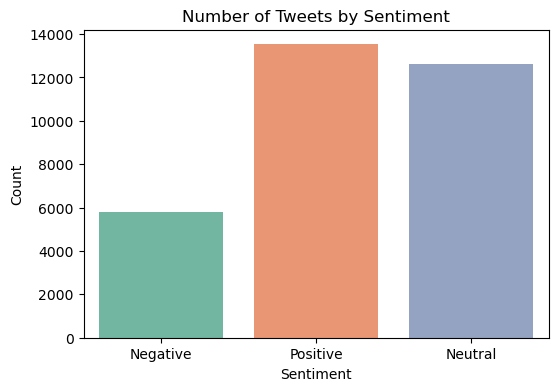

In [39]:
#Sentiment Distribution

plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment_Label', data=df, palette='Set2')
plt.title("Number of Tweets by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


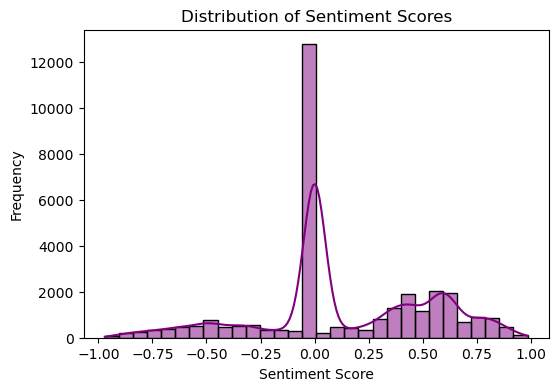

In [30]:
#Histogram of Sentiment Scores

plt.figure(figsize=(6,4))
sns.histplot(df['Sentiment_Score'], bins=30, kde=True, color="purple")
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

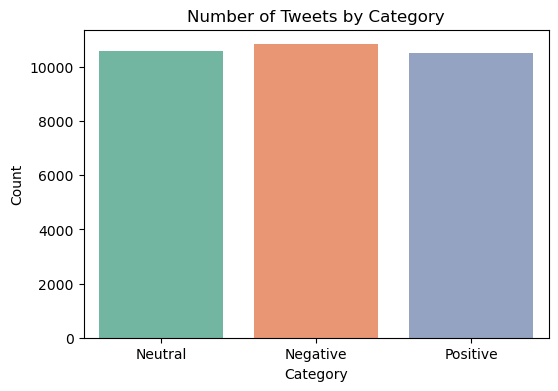

In [49]:
#Category

plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df, palette='Set2')
plt.title("Number of Tweets by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()



Conclusion:
-----------
In this project, we collected and analyzed social media (Twitter) data 
to understand public sentiment towards a topic. 

Steps we followed:
1. Preprocessed tweets by cleaning text (removing links, hashtags, stopwords).
2. Used NLP (VADER sentiment analysis) to assign each tweet a sentiment score.
3. Classified tweets into Positive, Negative, and Neutral categories.
4. Visualized the results using bar charts, pie charts, histograms, wordclouds, 
   and sentiment trends over time.

Key Insights:
- Sentiment analysis helps quickly identify public opinion patterns.
- Positive, Negative, and Neutral tweets can be compared to see overall mood.
- Trends over time reveal how events or announcements affect sentiment.
- Word clouds highlight the most common words driving positive oracted successfully.")
